In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
print("Features (X):")
print(X[:5])  # Print the first 5 rows of the features
print(iris.feature_names)
print(iris.target_names)

Features (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


# Coefficient of Determination $ R^2 $ 

The coefficient of determination $ R^2 $ is calculated using the following formula:

$$ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} $$

Where:
- $( SS_{\text{res}} )$ (Residual Sum of Squares) is the sum of the squared differences between the observed values $( y_i )$ and the predicted values $( \hat{y}_i )$:

$$ SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- $( SS_{\text{tot}} )$ (Total Sum of Squares) is the sum of the squared differences between the observed values $( y_i )$ and the mean of the observed values $( \bar{y} )$:

$$ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

Steps to Calculate $( R^2 )$

1. **Calculate the Mean of the Observed Values**:

$$ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i $$

2. **Calculate $( SS_{\text{tot}} )$**:

$$ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

3. **Calculate $( SS_{\text{res}} )$**:

$$ SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

4. **Calculate $( R^2 )$**:

$$ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} $$

5. **The adjusted $( R^2 )$ is calculated as follows**:
 $$ [ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p} \right) ] $$
 Where:
 - $ R^2 $ is the coefficient of determination.
 - ( n ) is the number of observations.
 - ( p ) is the number of parameters (including the intercept).

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Create a DataFrame from the iris data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
df['target'] = iris.target

# Display the first few rows of the DataFrame
print(df.head())

# Features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 1.00


Accuracy: 1.00


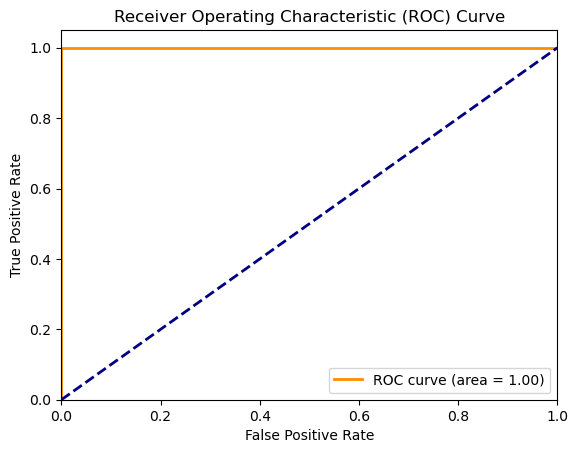

Gini Coefficient: 1.00


In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (select only two classes)
binary_mask = y != 2
X = X[binary_mask]
y = y[binary_mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('pca', PCA(n_components=2)),  # Step 2: Reduce dimensionality
    ('svc', SVC(probability=True))  # Step 3: Train a Support Vector Classifier with probability estimates
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Gini coefficient
gini = 2 * roc_auc - 1
print(f"Gini Coefficient: {gini:.2f}")